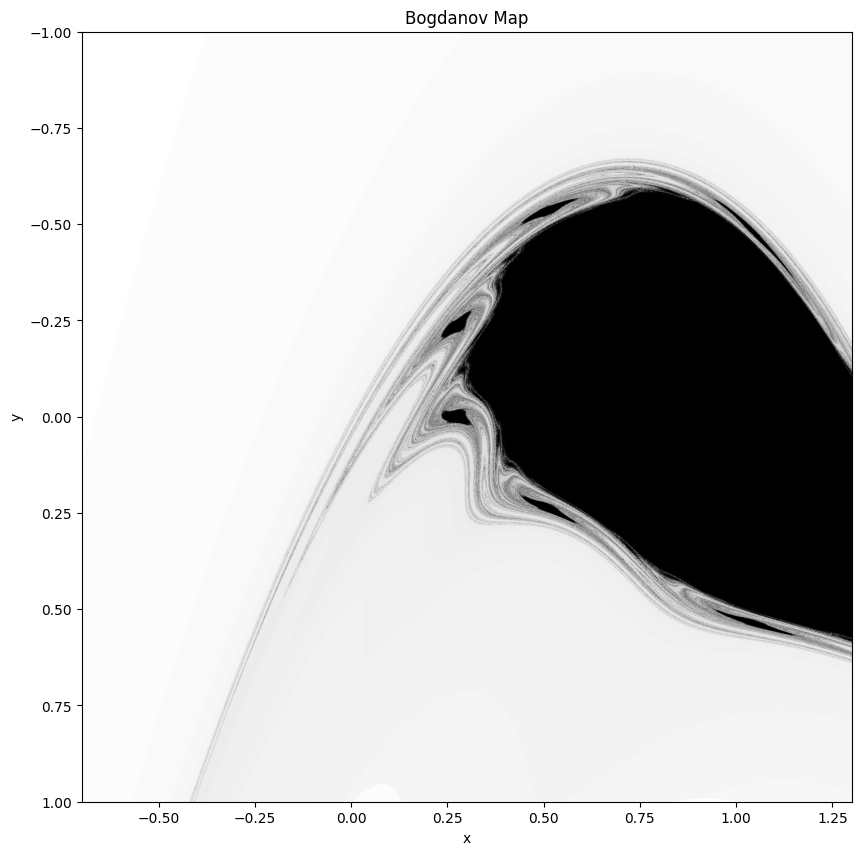

In [5]:
#%%Bogdanov Map
import numpy as np
import plotly.graph_objects as go
import math
import matplotlib.pyplot as plt


def bogdanov(k, mu, eps, x, y):
  y_n = y + eps * y + k * x * (x - 1) + mu * x * y
  x_n = x + y_n
  return x_n, y_n

def bogda_gen(k, mu, eps, x0, y0, n=10000):
  x = np.zeros(n)
  y = np.zeros(n)
  x[0] = x0
  y[0] = y0

  for i in range(1, n):
    x[i], y[i] = bogdanov(k, mu, eps, x[i-1], y[i-1])

  return x, y

def bogda_map(k=1.2, mu=0, eps=0, xlim=(-0.7, 1.3), ylim=(-1, 1), precision = 2000, max=1000, display=True):
  precision_y = int((ylim[1] - ylim[0]) / (xlim[1] - xlim[0]) * precision)
  xa = np.linspace(xlim[0], xlim[1], precision)
  ya = np.linspace(ylim[0], ylim[1], precision_y)
  X, Y = np.meshgrid(xa, ya)

  n_iter = np.zeros(X.shape, dtype=int)

  def step(xx, yy):
    yy_new = yy * (1 + eps + mu * xx) + k * xx * (1 - xx)
    xx_new = xx + yy_new
    return xx_new, yy_new

  current_x = X.copy()
  current_y = Y.copy()

  for _ in range(max):
    not_div = (np.abs(current_x) <= 2) & (np.abs(current_y) <= 2)
    n_iter[not_div] += 1

    x_new, y_new = step(current_x[not_div], current_y[not_div])
    current_x[not_div] = x_new
    current_y[not_div] = y_new

  if display :
    plt.figure(figsize=(12,10))
    plt.imshow(np.sqrt(n_iter),
                   extent=[xlim[0], xlim[1], ylim[1], ylim[0]],
                   cmap='binary')
    plt.title("Bogdanov Map")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    return n_iter

n_iter = bogda_map(
    eps= 0,
    mu = 0,
    k = 1.2,
    xlim = (-0.7, 1.3),
    ylim = (-1, 1),
    precision = 3000,
    max = 1000,
    display = True
)